# Sample notebook

This R Markdown notebook shows how you can interface with the [OpenAI API](https://beta.openai.com/docs/api-reference/introduction).

### Libraries

In [ ]:
!pip install openai
import os
import openai
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 163 kB 62.2 MB/s 
  Created wheel for openai: filename=openai-0.23.1-py3-none-any.whl size=54527 sha256=4df1bf7e1ead7f2078e16a74df946662a80a76eb91d9ce41156e2e1e3b7534ff
  Stored in directory: /root/.cache/pip/wheels/5f/f5/69/860bc773610989840e34f3352d39a4651a76f509cf1610bf22
Successfully built openai


### Variables for the OpenAI API

See the list of possible model URLs to query from [here](https://beta.openai.com/docs/api-reference/models/list).

In [ ]:
# Change this link if you want to use another model (see above)
api_url = "https://api.openai.com/v1/engines/davinci/completions"

# This is the secret API key available from your OpenAI account
openai.api_key = "sk-*"

# Your prompt is what the mdoel sees to continue
prompt = "Who said \"What is Love baby dont hurt me.\""

# temperature decides the "creativity". If set to 0, you will always get the same answer
# max_tokens decides how large the output is allowed to be
# Generate the completion
output = openai.Completion.create(
    engine="text-davinci-002",
    prompt=prompt,
    temperature=0,
    max_tokens=20
)

In [ ]:
output.c

### Output

In [ ]:
print("Raw output:\n---\n", output)
print("---\nText output:\n", output["choices"][0]["text"])

Raw output:
---
 {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\nHaddaway"
    }
  ],
  "created": 1664651011,
  "id": "cmpl-5wc3nNTPx1IqZc4sNJJT40u0PurLT",
  "model": "text-davinci-002",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 5,
    "prompt_tokens": 11,
    "total_tokens": 16
  }
}
---
Text output:
 

Haddaway


## Example use

Here, we use the model to generate endings to Danish news article titles' first 5 letters.

In [ ]:
# Use the Sentida package to analyze Danish sentiment of outputs (use Vader for English)
!pip install sentida
from sentida import Sentida
s = Sentida()

In [ ]:
# Dataset generation
df = pd.read_csv("Mappe1.csv")


max_tokens = 15

# Run the API on the titles
df["output"] = [openai.Completion.create(
    engine="text-davinci-002",
    prompt=p,
    temperature=0.4,
    max_tokens=20
)["choices"][0]["text"] for p in df["prompt"]]

# Combine the prompt and the output into a new title
df["new_title"] = df["prompt"]+df["output"]
df["new_title_trunc"] = [text[:30]+"..." for text in df["new_title"]]

# Evaluate the sentiment of the title
df["sentiment"] = [s.sentida(text) for text in df["new_title"]]

0    0.000000
1   -0.183333
2   -0.108730
3   -0.258333
4   -0.066667
Name: sentiment, dtype: float64

### Inspect the results


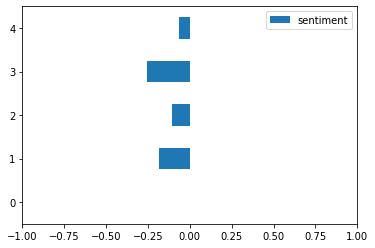

In [ ]:
df[["sentiment", "new_title_trunc"]].plot.barh(xlim=[-1, 1])